# Kaggle Competition for House Price: Advanced Regression Techniques

* Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

* With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

* Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [25]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# load the train data
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
# load the test data
df_test = pd.read_csv("test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Exploratory data analysis

In [28]:
print("train data ", df_train.shape)
print("test_data ", df_test.shape)

train data  (1460, 81)
test_data  (1459, 80)


In [29]:
# gives the data type of each column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [30]:
pd.options.display.max_rows = 4000 # used this to see all rows of output

# finding the null values across df
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Preprocessing:
* for numerical data, will use mean values to fill all the null values
* for object data or categorical data, will use mode value to fill all the null values
* for some columns which have lot of missing values, will drop the entire column

### For preprocessing the train and test data, will define function which will drop columns, fill all the null values with mean and mode 

In [31]:
# these columns have a lot of null values out of 1460 train data points so, will drop the entire column
# Alley            1369
# PoolQC           1453
# Fence            1179
# MiscFeature      1406
# will drop these coulumns from train and test data set

In [32]:
# drop the columns which have more than 75% of null values
def drop_null_values(df):
    print("Before dropping columns: ", df.shape)
    cols = df.columns
    drop_cols =[]
    for col in cols:
        if df[col].isnull().sum() > int(len(df) * 3/4):
            drop_cols.append(col)
    print(drop_cols)  
    df.drop(columns = drop_cols, axis=1, inplace=True)
    print("After dropping columns: ",drop_cols, " : ", df.shape)
    return df

In [33]:
# Fill the null values of numerical and categorical with mean and mode respectively
def fill_null_values(df):
    # find out the type of colums and create a num_cols and cat_cols for numerical and categorical columns
    cols = df.columns
    cat_cols = []
    num_cols = []
    for col in cols:
        if str(df_train[col].dtypes) == 'object':
            cat_cols.append(col)
        else:
            num_cols.append(col)
            
    # for numerical data(num_cols), will use mean values to fill all the null values
    # for object data(cat_cols) or categorical data, will use mode value to fill all the null values 
    for col in cat_cols:
        df[col]=df[col].fillna(df[col].mode()[0])
        
    for col in num_cols:
        df[col]=df[col].fillna(df[col].mean())
        
    # check wether any nullvalues still present or not
    print("Null values present: ", df.isnull().sum().any())
    
    return df 

## Preprocess the train data

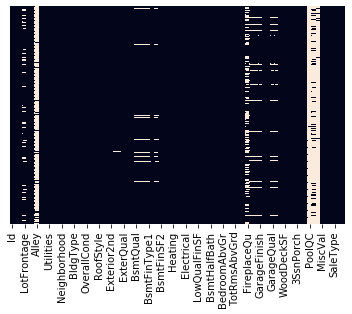

In [34]:
# this heat map will show the null values ex. PoolQC, MiscFeature have lot of missing values
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [35]:
# call the function to preprocess the data
df_train = drop_null_values(df_train)
df_train = fill_null_values(df_train)

Before dropping columns:  (1460, 81)
['Alley', 'PoolQC', 'Fence', 'MiscFeature']
After dropping columns:  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']  :  (1460, 77)
Null values present:  False


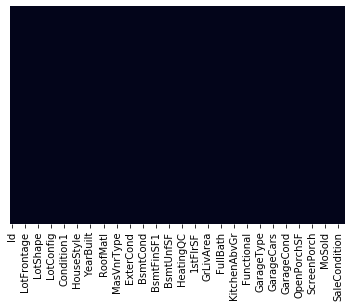

In [36]:
# this heat map will show the null values ex. PoolQC, MiscFeature have lot of missing values
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

## Preprocess the test data

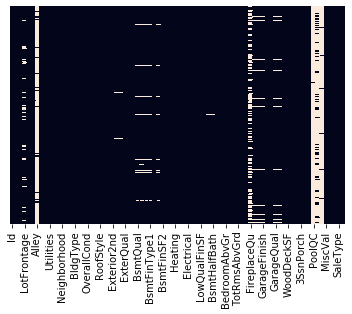

In [37]:
# this heat map will show the null values ex. PoolQC, MiscFeature have lot of missing values
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [38]:
# call the function to preprocess the data
df_test = drop_null_values(df_test)
df_test = fill_null_values(df_test)

Before dropping columns:  (1459, 80)
['Alley', 'PoolQC', 'Fence', 'MiscFeature']
After dropping columns:  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']  :  (1459, 76)
Null values present:  False


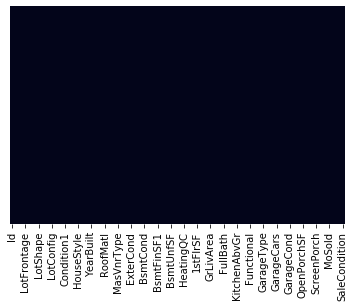

In [39]:
# this heat map will show the null values ex. PoolQC, MiscFeature have lot of missing values
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [60]:
cat_cols = []
cols = df_train.columns
for col in cols:
    if str(df_train[col].dtypes) == 'object':
        cat_cols.append(col)
cat_cols        

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [63]:
len(df_train['MSZoning'].unique()) != len(df_train['MSZoning'].unique())

False

In [65]:
# check the different categories of categorical data set

for col in cat_cols:
    #print(col)
    
    if len(df_train[col].unique()) != len(df_train[col].unique()):
        print("*****", col ,"*****")
        print(df_train[col].value_counts())
        print(df_test[col].value_counts())
        print()
    else:
        print(col, False)

MSZoning False
Street False
LotShape False
LandContour False
Utilities False
LotConfig False
LandSlope False
Neighborhood False
Condition1 False
Condition2 False
BldgType False
HouseStyle False
RoofStyle False
RoofMatl False
Exterior1st False
Exterior2nd False
MasVnrType False
ExterQual False
ExterCond False
Foundation False
BsmtQual False
BsmtCond False
BsmtExposure False
BsmtFinType1 False
BsmtFinType2 False
Heating False
HeatingQC False
CentralAir False
Electrical False
KitchenQual False
Functional False
FireplaceQu False
GarageType False
GarageFinish False
GarageQual False
GarageCond False
PavedDrive False
SaleType False
SaleCondition False


* All the categories of train and test data are having same category.

In [66]:
# Save the preprocessed test data into a seperate file
df_test.to_csv('formulatedtest.csv',index=False)

In [67]:
# Concate the train and test dataset to convert the all Convert categorical variable into dummy/indicator variables

final_df=pd.concat([df_train, df_test],axis=0)

/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


### Define a function which will convert all the categorical variable into dummy/indicator variables.

In [69]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [71]:
final_df=category_onehot_multcols(cat_cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [72]:
print("shape of final_df: ", final_df.shape)

shape of final_df:  (2919, 238)


In [73]:
# drop the duplicate records if any
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [74]:
print("shape of final_df: ", final_df.shape)

shape of final_df:  (2919, 178)


In [75]:
# let's see the final_df
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [79]:
# create train_df and test_df dataset from final_df
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [80]:
df_train.shape

(1460, 77)

In [81]:
df_Train.shape

(1460, 178)

In [82]:
df_Test.shape

(1459, 178)

In [83]:
# Drop the sales column from the df_Train i.e test data set
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [84]:
df_Test.shape

(1459, 177)

## Create Model

In [85]:
# create train and test dataset from df_Train processed data set
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


In [86]:
import xgboost
model=xgboost.XGBRegressor()
model.fit(X_train, y_train)

/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/raman/anaconda3/envs/tensorflow/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:32:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [87]:
# predict the result for test data
y_pred = model.predict(df_Test)

In [88]:
 y_pred

array([124215.09, 156178.33, 180190.44, ..., 168164.98, 122319.57,
       237975.95], dtype=float32)

In [90]:
# create sample submission file and submit
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis =1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv("sample_submission.csv", index = False)